Proceso:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [1]:
import sys
sys.path.insert(0, '../')
import utils.common as cm
import utils.bootcampviztools as bt 

import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')



### Cargar el dataset

In [2]:
df = pd.read_csv('../data_sample/marketing_campaign.csv', sep=';')

### Exploración inicial

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# def preprocesado_df_marketing_campaign(df):
    
#     #df_model=df.copy
#     #Elimina duplicados si los hay

#     #Elimina columnas
#     df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#     # Crear características derivadas
#     ##Age_group
#     df['Age'] = 2015 - df['Year_Birth']
#     cut_labels_Age = ['<35', '35-50', '50-65', '+65']
#     cut_bins = [0, 35, 50, 65, 120]
#     df['Age_group'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_Age)
    
#     ## Income_group
#     cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
#     df['Income_group'] = pd.qcut(df['Income'], q=4, labels=cut_labels_Income)

#     ##TotalSons
#     df['TotalSons'] = df['Kidhome'] + df['Teenhome']
    
#     def education_level(education):
#         if education in ['2n Cycle', 'PhD', 'Master']:
#             return 'High'
#         elif education in ['Graduation']:
#             return 'Medium'
#         else:
#             return 'Basic'
#     df['Education_Level'] = df['Education'].apply(education_level)
    
#     # Función para clasificar según TotalSons y Marital_Status
#     def family_status(row):
#         if row['TotalSons'] == 0 and row['Marital_Status'] in ['Absurd', 'Alone', 'Yolo', 'Single', 'Widow', 'Divorced']:
#             return 'AloneNoKids'
#         elif row['TotalSons'] == 0:
#             return 'InPartneringNoKids' #DINK - Double Income No Kids
#         elif row['Marital_Status'] in ['Absurd', 'Alone', 'Yolo', 'Single', 'Widow', 'Divorced']:
#             return 'AloneWithKids' 
#         else:
#             return 'InPartneringWhitKids'

# # Aplico la función al DataFrame principal
#     df['Family_Status'] = df.apply(family_status, axis=1)

#     #Creacion Features Total gastado sumando todos los gastos en los distintos productos
#     df['Total_Spend']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
    
#     #Creacion Features que suma los resultados de todas las campañas realizadas
#     df['Total_Campañas_Aceptadas']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

#     #Creacion Features suma de todas las compras realizadas en los distintos canales
#     df['Total_Compras']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases']
    
#     #Create the new feature AmountPerPurchase 
#     df['MediaXcompra'] = df['Total_Spend'] / (df['Total_Compras']+1)

    
#     return df

In [4]:
model = cm.preprocesado_df_marketing_campaign(df)


In [5]:
model

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Age_group,Income_group,TotalSons,Education_Level,Family_Status,Total_Spend,Total_Campañas_Aceptadas,Total_Compras,MediaXcompra
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,58,50-65,Medium to high income,0,Medium,AloneNoKids,1617,1,25,62.192308
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,61,50-65,Low to medium income,2,Medium,AloneWithKids,27,0,6,3.857143
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,50,35-50,High income,0,Medium,InPartneringNoKids,776,0,21,35.272727
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,31,<35,Low income,1,Medium,InPartneringWhitKids,53,0,8,5.888889
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,34,<35,Medium to high income,1,High,InPartneringWhitKids,422,0,19,21.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,48,35-50,Medium to high income,1,Medium,InPartneringWhitKids,1341,0,18,70.578947
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,69,+65,Medium to high income,3,High,InPartneringWhitKids,444,1,22,19.304348
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,34,<35,Medium to high income,0,Medium,AloneNoKids,1241,1,19,62.050000
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,59,50-65,High income,1,High,InPartneringWhitKids,843,0,23,35.125000


ID: Identificación única de cada cliente.

Year_Birth: Año de nacimiento del cliente.

Education: Nivel educativo del cliente.

Marital_Status: Estado civil del cliente.

Kidhome: Número de niños pequeños en el hogar del cliente.

Teenhome: Número de adolescentes en el hogar del cliente.

Income: Ingreso anual del hogar del cliente en USD.

Recency: Número de días desde la última compra.

Dt_Customer: Fecha de inscripción del cliente en la empresa.

MntFishProducts: Cantidad gastada en productos de pescado en los últimos 2 años.

MntMeatProducts: Cantidad gastada en productos de carne en los últimos 2 años.

MntFruits: Cantidad gastada en productos de frutas en los últimos 2 años.

MntSweetProducts: Cantidad gastada en productos dulces en los últimos 2 años.

MntWines: Cantidad gastada en productos de vino en los últimos 2 años.

MntGoldProds: Cantidad gastada en productos de oro en los últimos 2 años.

NumDealsPurchases: Número de compras realizadas con descuento.

NumCatalogPurchases: Número de compras realizadas mediante catálogo (compra de productos enviados por correo).

NumStorePurchases: Número de compras realizadas directamente en tiendas.

NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa.

NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes.

AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.

AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.

AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.

AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.

AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.

Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.

Complain: 1 si el cliente presentó una queja en los últimos 2 años, 0 en caso contrario.

<!-- ID: Unique ID of each customer
Year_Birth: Customer’s year of birth
Education: Customer's level of education
Marital_Status: Customer's marital status
Kidhome: Number of small children in customer's household
Teenhome: Number of teenagers in customer's household
Income: Customer's yearly household income in USD
Recency: Number of days since the last purchase
Dt_Customer: Date of customer's enrollment with the company
MntFishProducts: The amount spent on fish products in the last 2 years
MntMeatProducts: The amount spent on meat products in the last 2 years
MntFruits: The amount spent on fruits products in the last 2 years
MntSweetProducts: Amount spent on sweet products in the last 2 years
MntWines: The amount spent on wine products in the last 2 years
MntGoldProds: The amount spent on gold products in the last 2 years
NumDealsPurchases: Number of purchases made with discount
NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
NumStorePurchases: Number of purchases made directly in stores
NumWebPurchases: Number of purchases made through the company's website
NumWebVisitsMonth: Number of visits to the company's website in the last month
AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain: 1 If the customer complained in the last 2 years, 0 otherwise -->

The dataset contains the following features:

ID: Unique ID of each customer
Year_Birth: Customer’s year of birth
Education: Customer's level of education
Marital_Status: Customer's marital status
Kidhome: Number of small children in customer's household
Teenhome: Number of teenagers in customer's household
Income: Customer's yearly household income in USD
Recency: Number of days since the last purchase
Dt_Customer: Date of customer's enrollment with the company
MntFishProducts: The amount spent on fish products in the last 2 years
MntMeatProducts: The amount spent on meat products in the last 2 years
MntFruits: The amount spent on fruits products in the last 2 years
MntSweetProducts: Amount spent on sweet products in the last 2 years
MntWines: The amount spent on wine products in the last 2 years
MntGoldProds: The amount spent on gold products in the last 2 years
NumDealsPurchases: Number of purchases made with discount
NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
NumStorePurchases: Number of purchases made directly in stores
NumWebPurchases: Number of purchases made through the company's website
NumWebVisitsMonth: Number of visits to the company's website in the last month
AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain: 1 If the customer complained in the last 2 years, 0 otherwise

In [4]:
df.head(-20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,692,1954,Graduation,Together,36807.0,1,1,2012-12-20,88,4,...,6,0,0,0,0,0,0,3,11,0
2216,736,1983,Graduation,Together,28427.0,1,0,2013-03-21,67,18,...,8,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-04-05,54,332,...,1,0,0,0,0,0,0,3,11,0
2218,4838,1978,Graduation,Together,22775.0,1,0,2013-06-19,40,5,...,8,0,0,0,0,0,0,3,11,0


In [5]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
df.Z_Revenue.nunique()

1

### Preprocesamiento de datos

In [7]:
# Verificar duplicados
sum(df.duplicated())

0

In [8]:
# Verificar duplicados
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Rellenar valores nulos de Income con la mediana
df['Income'].fillna(df['Income'].median(), inplace=True)

In [10]:
# probar a imputar a income valores utilizando KNNImputer
# imputer = KNNImputer()
# imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# # fit on the dataset
# imputer.fit(dataset[['Income','Age','Educational_years']])
# # transform the dataset
# X = imputer.transform(dataset[['Income','Age','Educational_years']])
# Income_impute=pd.DataFrame(X,columns=['Income','Age','Educational_years'])
# dataset['Income']=Income_impute['Income'].reset_index(drop=True)
# count_nan = len(dataset) - dataset.count()
# print(count_nan)

### Comprensión de variables

In [11]:
cm.card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
ID,2240,100.0,int64,Numerica continua
Year_Birth,59,2.633929,int64,Numerica discreta
Education,5,0.223214,object,Categorica
Marital_Status,8,0.357143,object,Categorica
Income,1975,88.169643,float64,Numerica continua
Kidhome,3,0.133929,int64,Categorica
Teenhome,3,0.133929,int64,Categorica
Dt_Customer,663,29.598214,object,Numerica discreta
Recency,100,4.464286,int64,Numerica discreta
MntWines,776,34.642857,int64,Numerica continua


In [12]:
# Eliminar columnas con cardinalidad 100% o 0, que no aportan informacion 
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

<Axes: >

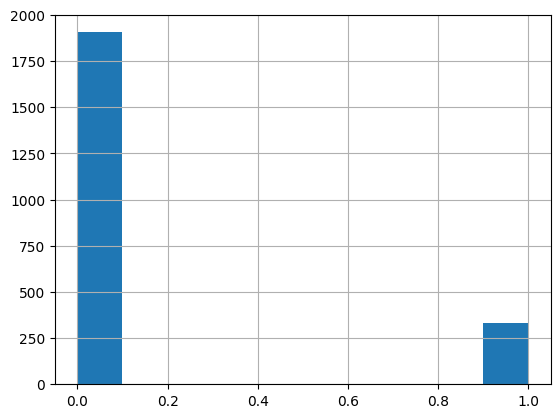

In [13]:
df.Response.hist()

In [14]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Detection valores anomalos :
- Years_Birth contiene un dato 1893 que parece ser un error. Lo elimino. 
- Creo columna Age. Elimino todo lo que es superiro a 100 por ser outliers/errores
- Income presenta un valor max de 666666, 12 veces superior a la media. Lo considero outlier y lo elimino

<Axes: >

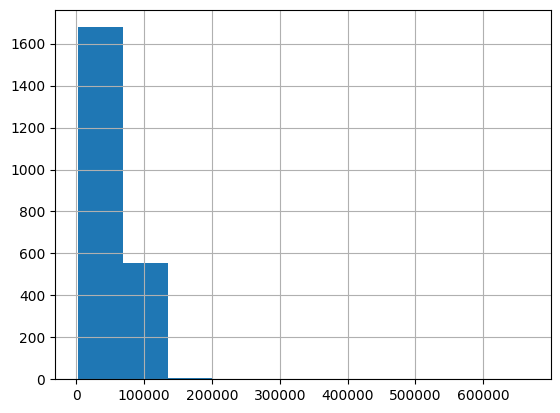

In [15]:
df['Income'].hist()

<Axes: ylabel='Income'>

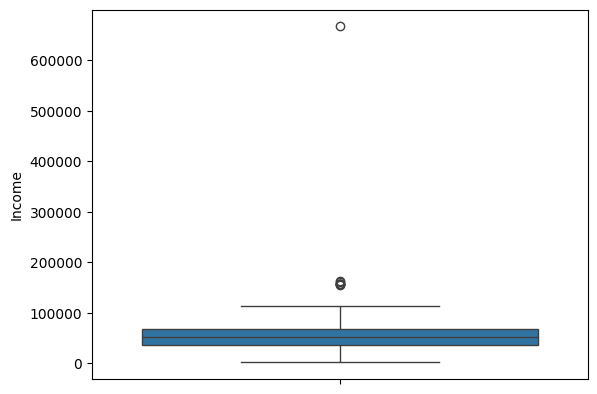

In [16]:
sns.boxplot(df['Income'])

In [17]:
df = df[df['Income'] < 600000].copy()

<Axes: >

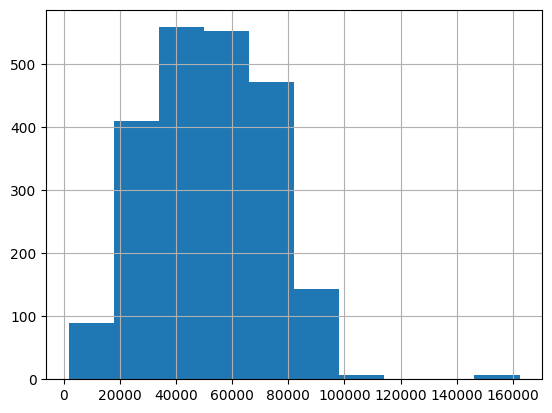

In [18]:
df['Income'].hist()

<Axes: ylabel='Income'>

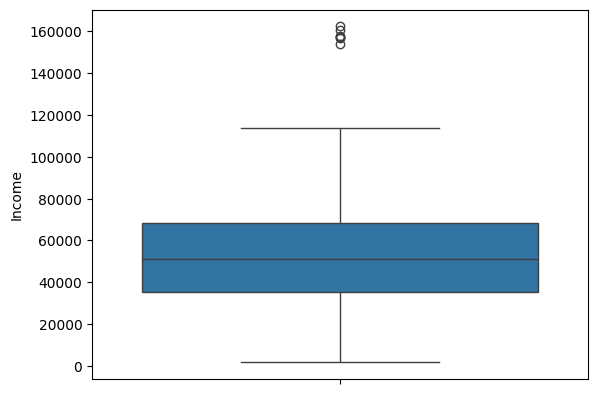

In [19]:
sns.boxplot(df['Income'])

In [20]:
df[df['Income'] > 120000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,0,1,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,0,0


Considero outliers todos los que estàn encima de percentile 75. 
De esta manera el Income se aproxima mas a una normal

In [21]:
df = df[df['Income'] < 120000 ].copy()

<Axes: >

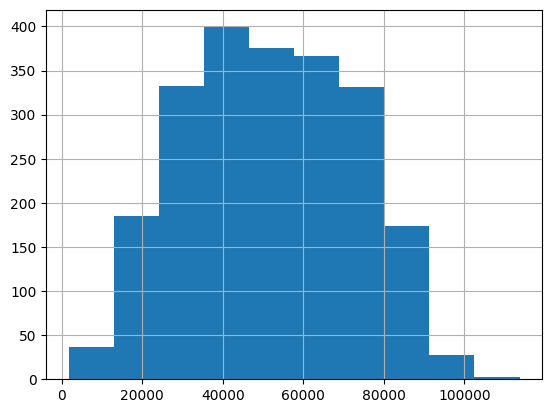

In [22]:
df['Income'].hist()

In [23]:
# Crear características derivadas
# Calculo edad a partir del año de nacimiento
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

<Axes: ylabel='Age'>

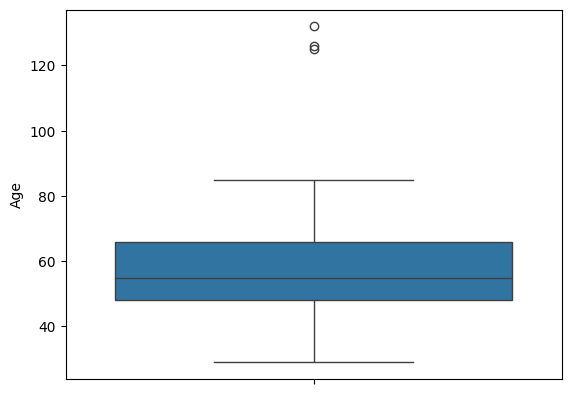

In [24]:
sns.boxplot(df['Age'])

In [25]:
df = df[df['Age'] < 100 ].copy()

<Axes: ylabel='Age'>

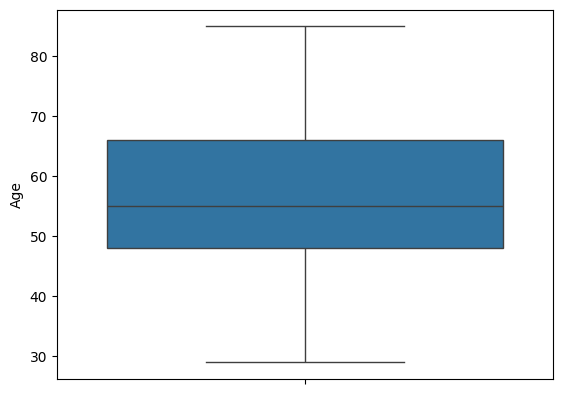

In [26]:
sns.boxplot(df['Age'])

In [27]:
df.Age.describe()

count    2229.000000
mean       56.111261
std        11.707430
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Age, dtype: float64

In [28]:
# Calculo antigüedad del cliente en días
# Conversion Dt_Customer a datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')
df['CustomerSinceInMonth'] = ((datetime.now() - df['Dt_Customer']).dt.days / 30).round(0)

In [29]:
df['CustomerSinceInMonth']

0       153.0
1       134.0
2       141.0
3       135.0
4       136.0
        ...  
2235    143.0
2236    131.0
2237    136.0
2238    136.0
2239    151.0
Name: CustomerSinceInMonth, Length: 2229, dtype: float64

In [30]:
# Creacion nueva variable
# Total de niños en casa
df['TotalSons'] = df['Kidhome'] + df['Teenhome']

In [31]:
# Función para clasificar según TotalSons y Marital_Status
def family_status(row):
    if row['TotalSons'] == 0 and row['Marital_Status'] in ['Absurd', 'Alone', 'Yolo', 'Single', 'Widow', 'Divorced']:
        return 'SoloSinHijos'
    elif row['TotalSons'] == 0:
        return 'SinHijos'
    elif row['Marital_Status'] in ['Absurd', 'Alone', 'Yolo', 'Single', 'Widow', 'Divorced']:
        return 'SoloConHijos'
    else:
        return 'ConHijos'

# Aplico la función al DataFrame principal
df['Family_Status'] = df.apply(family_status, axis=1)


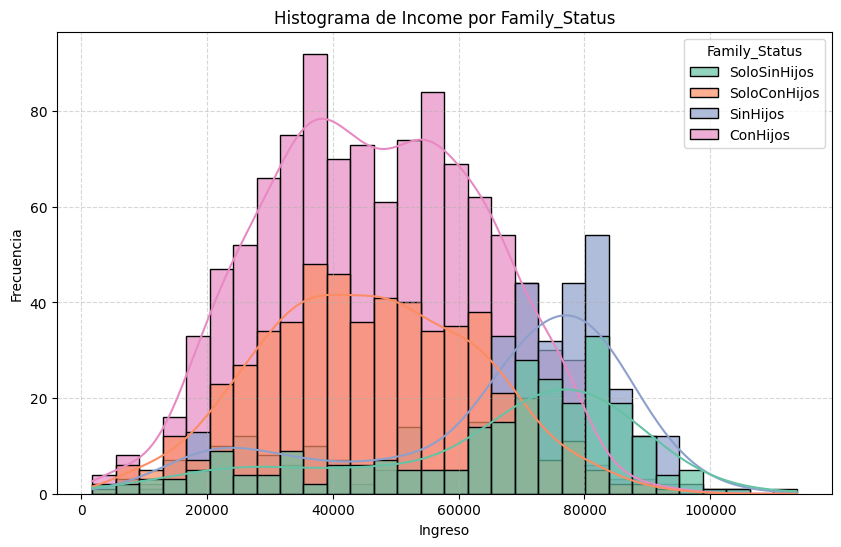

In [32]:
# Grafico de Income por Family_status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Income", hue="Family_Status", bins=30, kde=True, palette="Set2", alpha=0.7)

# Configurar etiquetas y título
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.title("Histograma de Income por Family_Status")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()

<Axes: >

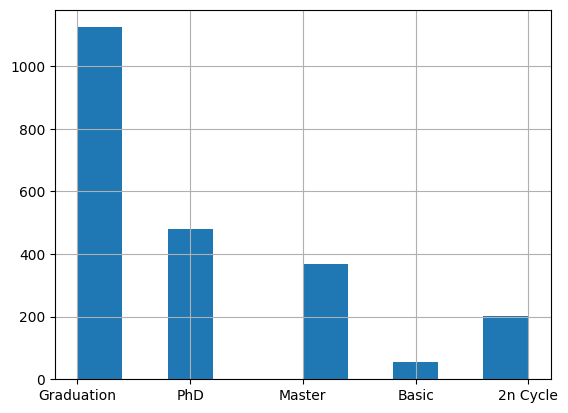

In [33]:
df['Education'].hist()

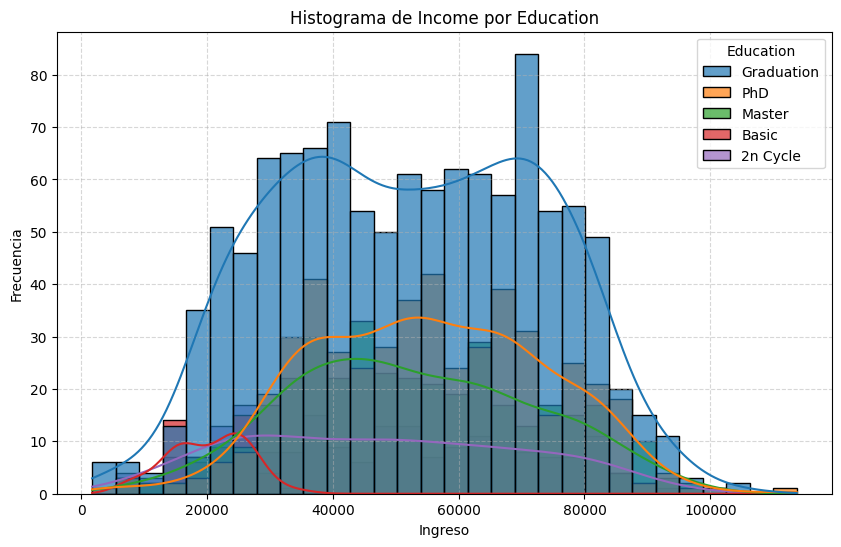

In [34]:
# Grafico de Income por Education
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Income", hue="Education", bins=30, kde=True, alpha=0.7)

# Configurar etiquetas y título
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.title("Histograma de Income por Education")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()

Considerando los niveles de educación ordenados de más alto a más bajo según jerarquía académica, creo 3 niveles : 'High' - 'Medium' - 'Basic'

🏆 PhD (Doctorado) 

🎓 Master (Maestría) 

2n Cycle (Segundo ciclo, equivale a estudios avanzados de licenciatura o especialización)

Graduation (Licenciatura o grado universitario)

Basic (Educación básica, primaria o secundaria)

In [35]:
def education_level(education):
    if education in ['2n Cycle', 'PhD', 'Master']:
        return 'High'
    elif education in ['Graduation']:
        return 'Medium'
    else:
        return 'Basic'

df['Education_Level'] = df['Education'].apply(education_level)

In [36]:
df['Education_Level'].value_counts()

Education_Level
Medium    1124
High      1051
Basic       54
Name: count, dtype: int64

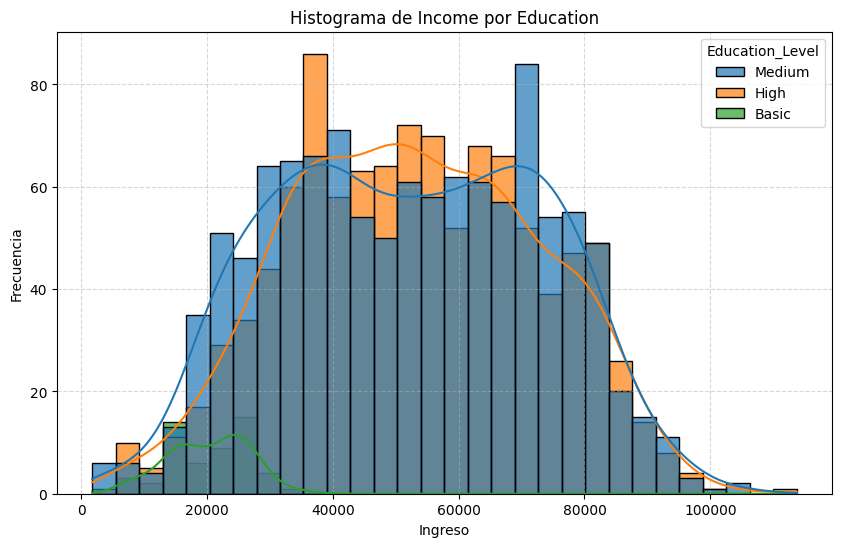

In [37]:
# Grafico de Income por Education
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Income", hue="Education_Level", bins=30, kde=True, alpha=0.7)

# Configurar etiquetas y título
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.title("Histograma de Income por Education")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()

<Axes: >

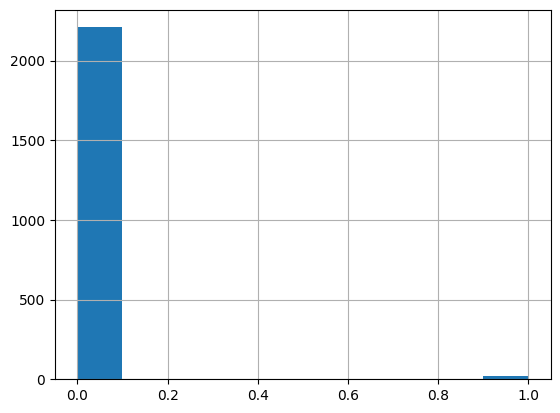

In [38]:
df.Complain.hist()

Complain: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable.

In [39]:
#Create total monthly spend column
df['Total_Spend']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [40]:
#Create total number of accepted campaign column
df['Total_Campañas_Aceptadas']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [41]:
#Create total purchases
df['Total_Compras']=df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases']

In [42]:
#Create the new feature AmountPerPurchase 
df['MediaXcompra'] = df['Total_Spend'] / (df['Total_Compras']+1)

In [43]:
df[['MediaXcompra', 'Total_Spend', 'Total_Compras'] ].sort_values(by = 'Total_Spend')

,MediaXcompra,Total_Spend,Total_Compras
1524,5.000000,5,0
981,6.000000,6,0
1245,8.000000,8,0
1420,2.000000,8,3
2129,2.000000,8,3
...,...,...,...
1052,97.600000,2440,24
987,95.615385,2486,25
1492,87.034483,2524,28
1179,140.277778,2525,17


In [44]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,CustomerSinceInMonth,TotalSons,Total_Spend,Total_Campañas_Aceptadas,Total_Compras,MediaXcompra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,...,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1968.888739,51619.504262,0.444594,0.507402,2013-07-10 05:20:25.841184512,49.106326,304.991476,26.348587,165.283984,37.642441,...,0.013459,0.008973,0.149843,56.111261,142.527591,0.951996,605.541050,0.448632,12.549125,35.016559
min,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,29.000000,131.000000,0.000000,5.000000,0.000000,0.000000,2.000000
25%,1959.000000,35416.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,48.000000,137.000000,0.000000,69.000000,0.000000,6.000000,11.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,176.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,55.000000,143.000000,1.000000,397.000000,0.000000,12.000000,27.583333
75%,1977.000000,68118.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,231.000000,50.000000,...,0.000000,0.000000,0.000000,66.000000,148.000000,1.000000,1044.000000,1.000000,18.000000,46.720000
max,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,85.000000,154.000000,3.000000,2525.000000,5.000000,32.000000,839.500000
std,11.707430,20601.216248,0.538636,0.544735,NaN,28.946476,336.761943,39.764060,219.336589,54.700548,...,0.115255,0.094319,0.356998,11.707430,6.753467,0.751976,601.032228,0.892158,7.181785,33.146656


In [45]:
df['Total_Spend'].sort_values()

1524       5
981        6
1245       8
1420       8
2129       8
        ... 
1052    2440
987     2486
1492    2524
1179    2525
1572    2525
Name: Total_Spend, Length: 2229, dtype: int64

Text(0, 0.5, 'Expenses')

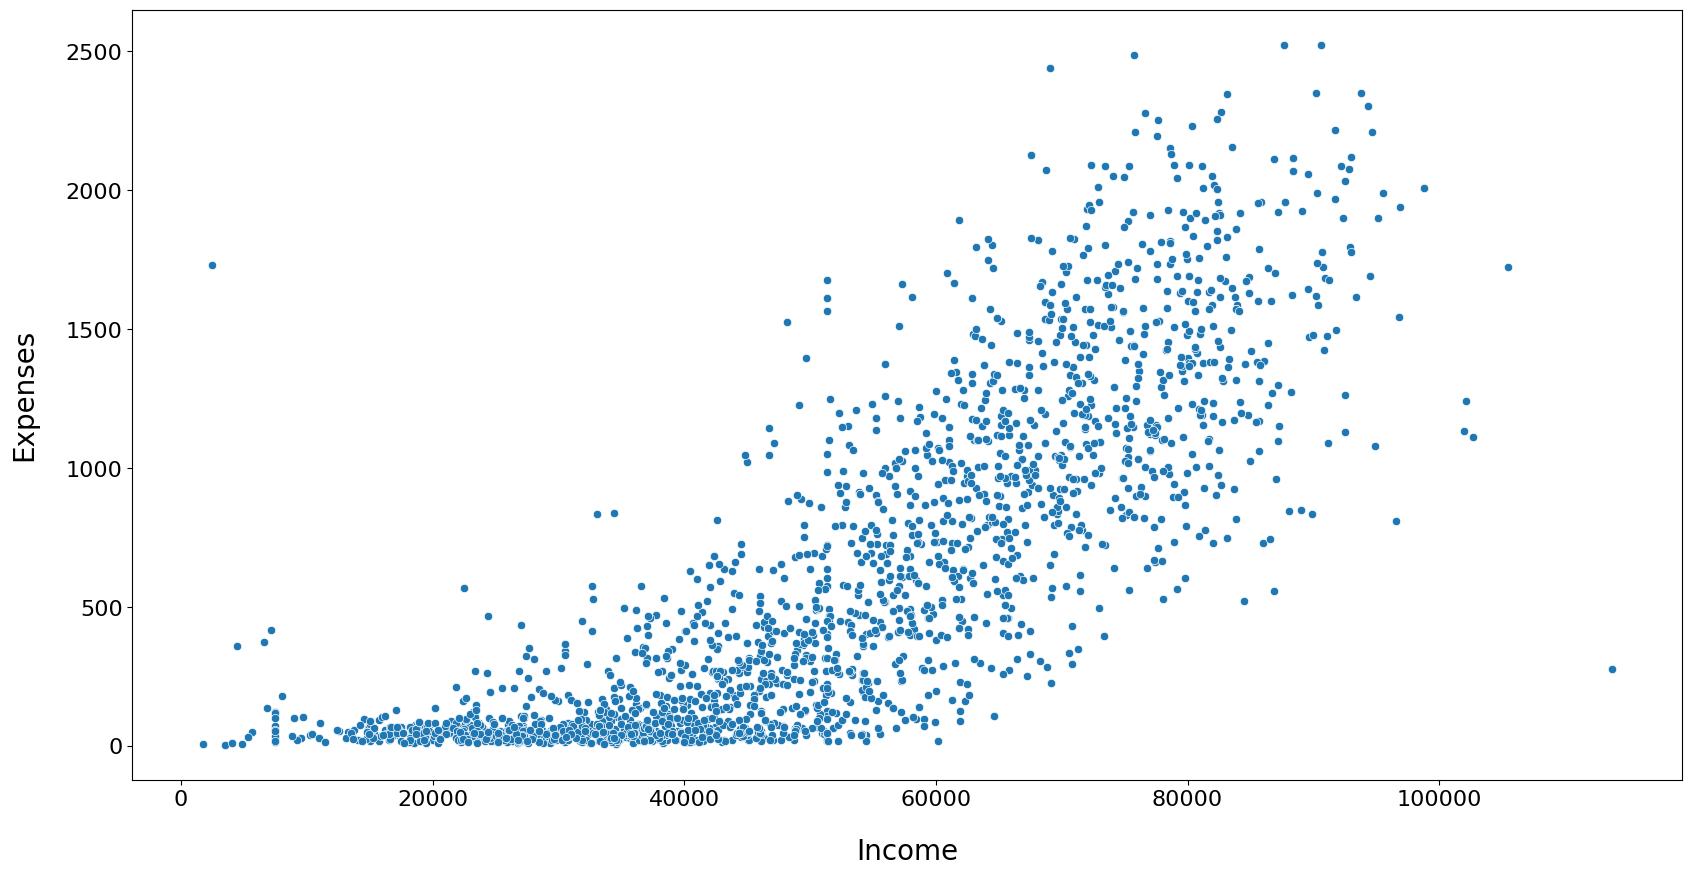

In [46]:
# Income Vs Expenses
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = 'Income', y = 'Total_Spend', data = df)                                        # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

There is a strong positive association between Income and Expenses, which means that the higher a customer's income is, the higher their expenses are. This makes sense because if a customer has more money, they probably spend more money as well with the exception of some outliers.

In [47]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'CustomerSinceInMonth',
       'TotalSons', 'Family_Status', 'Education_Level', 'Total_Spend',
       'Total_Campañas_Aceptadas', 'Total_Compras', 'MediaXcompra'],
      dtype='object')

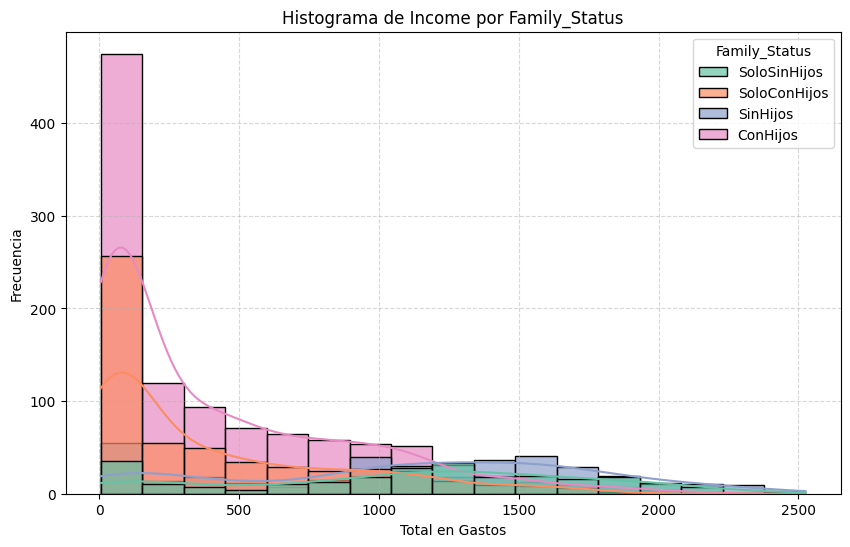

In [48]:
# Grafico de Income por Family_status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Total_Spend", hue="Family_Status", kde=True, palette="Set2", alpha=0.7)

# Configurar etiquetas y título
plt.xlabel("Total en Gastos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Income por Family_Status")
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()

In [49]:
cm.card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
Year_Birth,56,2.512337,int64,Numerica discreta
Education,5,0.224316,object,Categorica
Marital_Status,8,0.358905,object,Categorica
Income,1964,88.111261,float64,Numerica continua
Kidhome,3,0.13459,int64,Categorica
Teenhome,3,0.13459,int64,Categorica
Dt_Customer,663,29.74428,datetime64[ns],Numerica discreta
Recency,100,4.486317,int64,Numerica discreta
MntWines,775,34.768955,int64,Numerica continua
MntFruits,158,7.08838,int64,Numerica discreta


In [50]:
# Estadísticos
df.describe()
df.describe(include='all')

# Tipos de los datos
df.dtypes

# Tipos de los datos y missings
df.info()

# Columnas del dataset
df.columns

# dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year_Birth                2229 non-null   int64         
 1   Education                 2229 non-null   object        
 2   Marital_Status            2229 non-null   object        
 3   Income                    2229 non-null   float64       
 4   Kidhome                   2229 non-null   int64         
 5   Teenhome                  2229 non-null   int64         
 6   Dt_Customer               2229 non-null   datetime64[ns]
 7   Recency                   2229 non-null   int64         
 8   MntWines                  2229 non-null   int64         
 9   MntFruits                 2229 non-null   int64         
 10  MntMeatProducts           2229 non-null   int64         
 11  MntFishProducts           2229 non-null   int64         
 12  MntSweetProducts         

In [51]:
#sns.pairplot(df)

Error in callback <function flush_figures at 0x00000175EA7C6A20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

#### Report de variables 
##### Forzar el data type
pasar a bool las binaria-int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year_Birth                2229 non-null   int64         
 1   Education                 2229 non-null   object        
 2   Marital_Status            2229 non-null   object        
 3   Income                    2229 non-null   float64       
 4   Kidhome                   2229 non-null   int64         
 5   Teenhome                  2229 non-null   int64         
 6   Dt_Customer               2229 non-null   datetime64[ns]
 7   Recency                   2229 non-null   int64         
 8   MntWines                  2229 non-null   int64         
 9   MntFruits                 2229 non-null   int64         
 10  MntMeatProducts           2229 non-null   int64         
 11  MntFishProducts           2229 non-null   int64         
 12  MntSweetProducts         

### Seleccion de features

In [48]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'CustomerSinceInMonth',
       'TotalSons', 'Family_Status', 'Education_Level', 'Total_Spend',
       'Total_Campañas_Aceptadas', 'Total_Compras', 'MediaXcompra'],
      dtype='object')

In [ ]:
col_to_drop = ['Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

In [76]:
features= ['Income', 'Recency', 'Age', 'CustomerSinceInMonth',
       'TotalSons', 'Family_Status', 'Total_Spend', 'Total_Campañas_Aceptadas',
       'Total_Compras', 'Education_Level', 'MediaXcompra']

In [77]:
X = df[features]

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2229 non-null   float64
 1   Recency                   2229 non-null   int64  
 2   Age                       2229 non-null   int64  
 3   CustomerSinceInMonth      2229 non-null   float64
 4   TotalSons                 2229 non-null   int64  
 5   Family_Status             2229 non-null   object 
 6   Total_Spend               2229 non-null   int64  
 7   Total_Campañas_Aceptadas  2229 non-null   int64  
 8   Total_Compras             2229 non-null   int64  
 9   Education_Level           2229 non-null   object 
 10  MediaXcompra              2229 non-null   float64
dtypes: float64(3), int64(6), object(2)
memory usage: 273.5+ KB


#### Feature importance estadístico

In [ ]:
from sklearn.feature_selection import SelectKBest

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, Y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

### Análisis univariante

##### Features Numericas

##### Features Categoricas

<Axes: xlabel='count', ylabel='Education'>

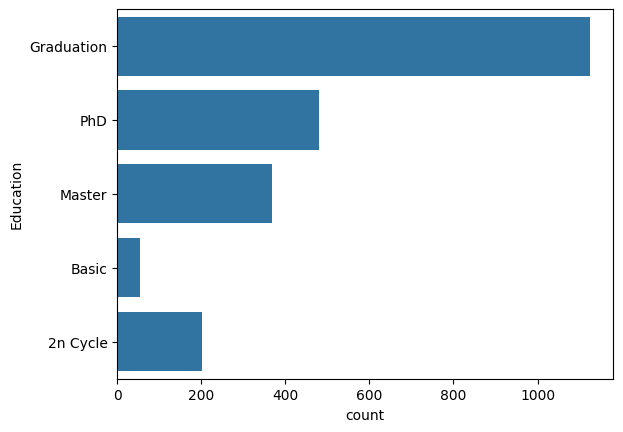

In [ ]:
sns.countplot(df["Education"])

<Axes: xlabel='count', ylabel='Marital_Status'>

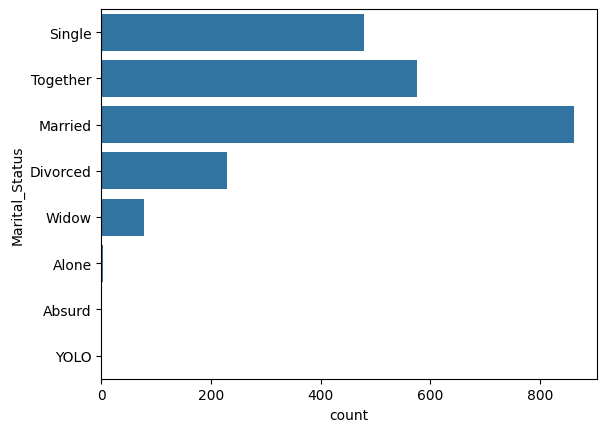

In [ ]:
sns.countplot(df["Marital_Status"])

##### Outliers eliminacion

##### Seleccion y eliminacion de features

### FEATURES ENGINEERING

##### Transformacion y escalado

In [66]:
# One-hot encode the categorical variables
X = pd.get_dummies(X, columns=["Family_Status", "Education_Level"])

In [67]:
X

,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CustomerSinceInMonth,TotalSons,Total_Spend,Total_Campañas_Aceptadas,Total_Compras,Family_Status_ConHijos,Family_Status_SinHijos,Family_Status_SoloConHijos,Family_Status_SoloSinHijos,Education_Level_Basic,Education_Level_High
0,58138.0,58,7,0,1,68,153.0,0,1617,1,22,False,False,False,True,False,True
1,46344.0,38,5,0,0,71,134.0,2,27,0,4,False,False,True,False,False,True
2,71613.0,26,4,0,0,60,141.0,0,776,0,20,False,True,False,False,False,True
3,26646.0,26,6,0,0,41,135.0,1,53,0,6,True,False,False,False,False,True
4,58293.0,94,5,0,0,44,136.0,1,422,0,14,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,5,0,0,58,143.0,1,1341,0,16,True,False,False,False,False,True
2236,64014.0,56,7,0,0,79,131.0,3,444,1,15,True,False,False,False,False,True
2237,56981.0,91,6,0,0,44,136.0,0,1241,1,18,False,False,False,True,False,True
2238,69245.0,8,3,0,0,69,136.0,1,843,0,21,True,False,False,False,False,True


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [71]:
X

,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,CustomerSinceInMonth,TotalSons,Total_Spend,Total_Campañas_Aceptadas,Total_Compras,Family_Status_ConHijos,Family_Status_SinHijos,Family_Status_SoloConHijos,Family_Status_SoloSinHijos,Education_Level_Basic,Education_Level_High
0,58138.0,58,7,0,1,68,153.0,0,1617,1,22,False,False,False,True,False,True
1,46344.0,38,5,0,0,71,134.0,2,27,0,4,False,False,True,False,False,True
2,71613.0,26,4,0,0,60,141.0,0,776,0,20,False,True,False,False,False,True
3,26646.0,26,6,0,0,41,135.0,1,53,0,6,True,False,False,False,False,True
4,58293.0,94,5,0,0,44,136.0,1,422,0,14,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,5,0,0,58,143.0,1,1341,0,16,True,False,False,False,False,True
2236,64014.0,56,7,0,0,79,131.0,3,444,1,15,True,False,False,False,False,True
2237,56981.0,91,6,0,0,44,136.0,0,1241,1,18,False,False,False,True,False,True
2238,69245.0,8,3,0,0,69,136.0,1,843,0,21,True,False,False,False,False,True


In [53]:
X.columns

NameError: name 'X' is not defined

In [55]:
# Convertir variables categóricas a numéricas
# Codificación one-hot para Education y Marital_Status
education_dummies = pd.get_dummies(X['Education_Level'], prefix='Edu')
marital_dummies = pd.get_dummies(X['Family_Status'], prefix='Status')

features= ['Income', 'Recency', 'Age', 'CustomerSinceInMonth', 'TotalSons',
        'Total_Spend', 'Total_Campañas_Aceptadas',
       'Total_Compras',  'MediaXcompra', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']
X = df[features]
# features= ['Income', 'Age', 'CustomerSinceInMonth',
#         'Total_Spend', 'Total_Campañas_Aceptadas',
#        'Total_Compras']

# Unir datasets
X_features = pd.concat([X[features], education_dummies, marital_dummies], axis=1)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)
df_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)      # Converting the embeddings to a dataframe

df_scaled.head()


NameError: name 'X' is not defined

In [103]:
#PCA
# Defining the number of principal components to generate
n = X_features.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components=n, random_state = 1)                                        # Initialize PCA with n_components = n and random_state=1

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_    

In [105]:
exp_var

array([0.25757715, 0.15174188, 0.11947989, 0.09413027, 0.09015233,
       0.08110584, 0.06866408, 0.05705462, 0.05549565, 0.01492987,
       0.00966843, 0.        , 0.        ])

In [104]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.757244,-1.445458,0.026140,-0.575402,2.046110,1.183618,1.255116,-1.268634,0.584114,-0.530977,0.451771,-5.765913e-16,-1.917443e-16
1,-1.440645,-1.250066,-1.644768,-1.782781,-0.799102,-0.848078,0.852697,0.422282,0.445189,0.416021,0.022359,-1.683406e-15,-1.015662e-15
2,1.714872,-1.384356,-0.129734,0.655481,-1.742615,-0.888092,0.327520,-0.932303,-0.278344,-0.148856,-0.651548,1.841552e-15,-4.622851e-16
3,-2.216406,-1.286272,1.066059,0.230062,0.337891,-1.147531,-0.710966,0.173664,-0.317641,-0.327475,0.194535,7.313290e-16,4.571184e-16
4,-0.547898,1.524540,1.047454,0.086747,0.183305,-0.696090,-0.731064,0.414488,-1.181357,0.040497,-0.260819,7.313290e-16,7.277352e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0.579419,-1.225544,1.514109,-0.337459,-0.313473,0.415493,0.207571,0.261450,-0.762798,0.146266,0.811951,-7.119609e-16,-2.090154e-16
2225,0.289834,1.911562,1.243111,-1.226931,-0.619333,-0.977705,1.161709,1.291377,0.584706,-0.143989,-0.291844,7.313290e-16,-8.265770e-16
2226,1.752688,-1.512881,-0.164976,-0.254939,2.669317,-1.392731,0.092949,-0.461984,-0.433132,-0.536466,0.268410,-1.325021e-16,3.633672e-16
2227,0.759632,1.756981,1.349084,-0.919230,-0.643946,-0.220376,0.772280,0.592991,-0.873610,-0.278716,-0.118603,3.982621e-16,-1.604432e-16


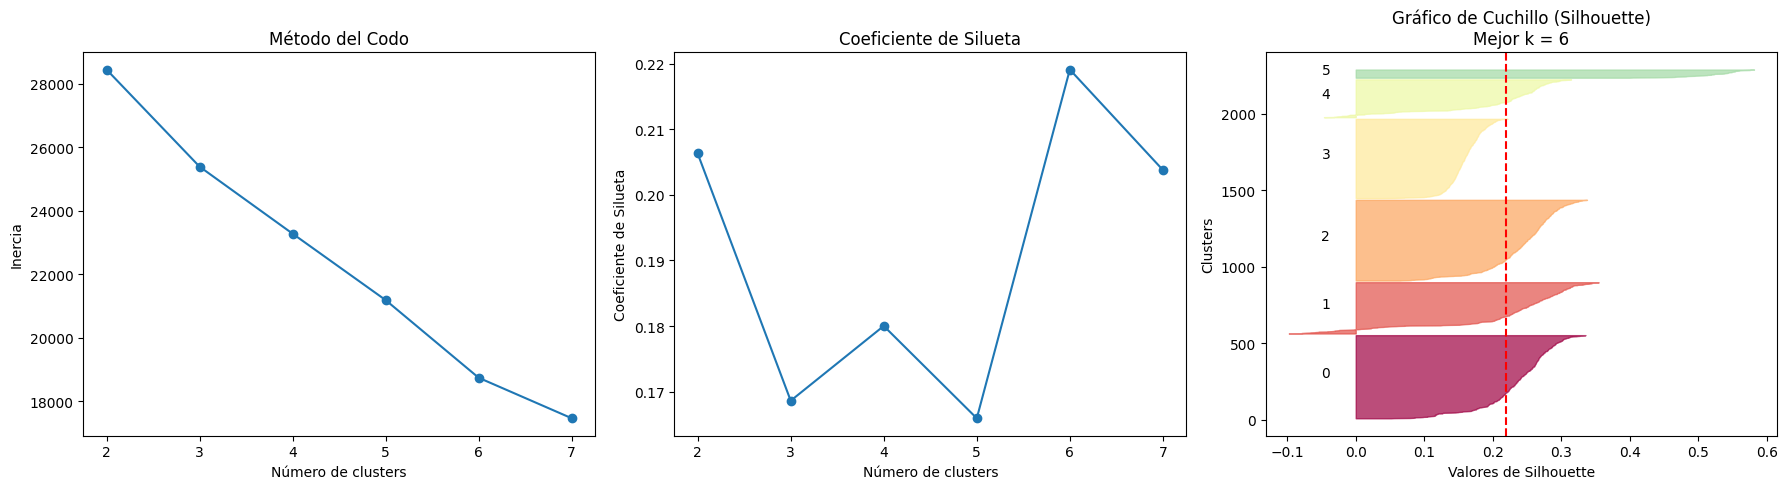

In [191]:
def find_optimal_k(data, max_k=7):
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Crear figura con 3 subplots
    plt.figure(figsize=(18, 5))
    
    # Método del codo
    plt.subplot(1, 3, 1)
    plt.plot(range(2, max_k+1), inertias, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    
    # Coeficiente de silueta
    plt.subplot(1, 3, 2)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.title('Coeficiente de Silueta')
    plt.xlabel('Número de clusters')
    plt.ylabel('Coeficiente de Silueta')
    
    # Gráfico de cuchillo (Silhouette Plot)
    plt.subplot(1, 3, 3)
    
    # Encontrar el mejor número de clusters basado en el coeficiente de silueta
    best_k = range(2, max_k+1)[np.argmax(silhouette_scores)]
    
    # Crear el gráfico de cuchillo para el mejor número de clusters
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calcular los puntajes de silueta para cada punto
    silhouette_vals = silhouette_samples(data, cluster_labels)
    
    y_lower = 10
    for i in range(best_k):
        # Agregar los puntajes de silueta de los puntos en este cluster
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Agregar etiquetas de cluster
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Calcular la próxima posición inferior
        y_lower = y_upper + 10
    
    # Línea vertical para el promedio
    plt.axvline(x=silhouette_score(data, cluster_labels), color="red", linestyle="--")
    
    plt.title(f'Gráfico de Cuchillo (Silhouette)\nMejor k = {best_k}')
    plt.xlabel('Valores de Silhouette')
    plt.ylabel('Clusters')
    
    plt.tight_layout()
    plt.show()
    
    return inertias, silhouette_scores, best_k

# Uso de la función
inertias, silhouette_scores, best_k = find_optimal_k(df_scaled)

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

In [186]:
kmeans = KMeans(n_clusters = 6, random_state = 1)                                # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(df_scaled)     

KMeans(n_clusters=6, random_state=1)

In [192]:
#df_scaled["K_means_segments_6"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df_scaled["K_means_segments_6"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

X_features["K_means_segments_6"] = kmeans.labels_ 

In [193]:
X_features["K_means_segments_6"].value_counts()

K_means_segments_6
0    544
2    528
3    519
1    336
4    248
5     54
Name: count, dtype: int64

In [194]:
# Taking the cluster-wise mean of all the variables. Hint: First groupby 'data' by 'K_means_segments_3' and then find mean
cluster_profile_KMeans_6 = X_features.groupby('K_means_segments_6').mean()

In [195]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_6.style.highlight_max(color="lightgreen", axis=0)

,Income,Recency,Age,CustomerSinceInMonth,TotalSons,Total_Spend,Total_Campañas_Aceptadas,Total_Compras,MediaXcompra,Edu_Basic,Edu_High,Edu_Medium,Status_ConHijos,Status_SinHijos,Status_SoloConHijos,Status_SoloSinHijos
K_means_segments_6,,,,,,,,,,,,,,,,
0,44359.545956,50.297794,55.025735,142.863971,1.257353,378.444853,0.187500,10.738971,23.855051,0.000000,0.000000,1.000000,0.944853,0.051471,0.000000,0.003676
1,73566.379464,48.119048,57.392857,142.678571,0.059524,1334.839286,1.023810,18.714286,70.564583,0.000000,0.476190,0.523810,0.053571,0.940476,0.005952,0.000000
2,46504.826705,48.257576,56.840909,141.748106,1.285985,383.284091,0.263258,10.910985,24.085811,0.000000,1.000000,0.000000,0.958333,0.041667,0.000000,0.000000
3,46542.537572,48.502890,56.664740,142.674374,1.348748,400.809249,0.300578,10.870906,25.286828,0.000000,0.466281,0.533719,0.000000,0.000000,1.000000,0.000000
4,66142.399194,51.044355,55.911290,142.399194,0.000000,1131.290323,1.012097,16.762097,60.242384,0.000000,0.487903,0.512097,0.000000,0.000000,0.000000,1.000000
5,20306.259259,48.444444,47.537037,145.000000,0.722222,81.796296,0.148148,5.222222,10.810719,1.000000,0.000000,0.000000,0.370370,0.259259,0.314815,0.055556


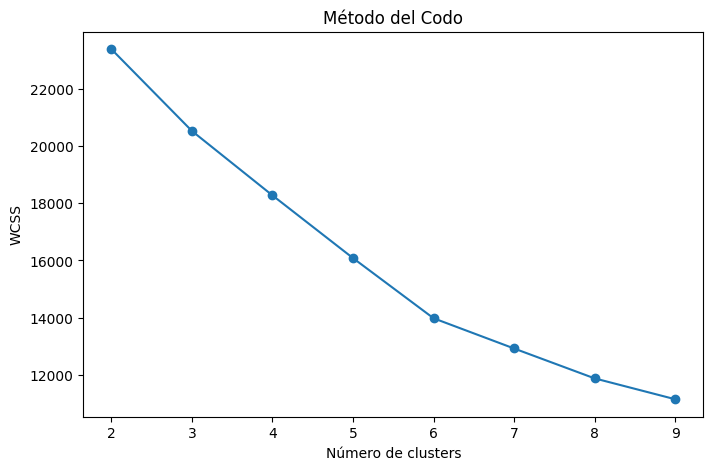

In [144]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

In [145]:
k_range

range(2, 10)

[0.19889537208702252, 0.1900032949494135, 0.22306720964527813, 0.2422824896343923, 0.26256542260684895]


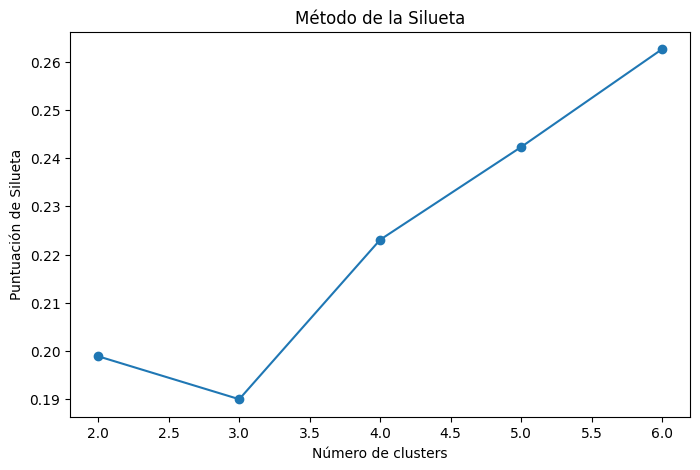

In [137]:
# Método de la silueta
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

print(silhouette_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()

In [148]:
sil_score = []                                                             # Creating empty list
cluster_list = range(2, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = k, random_state = 1).fit(X_scaled)
    
    # Fit and predict on the pca data
    y_pred = clusterer.fit_predict(X_scaled) 
    
    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(X_scaled, y_pred)  
    
    # Append silhouette score to empty list created above
    sil_score.append(score)   
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {}".format(n_clusters, sil_score))  

For n_clusters = 2, the silhouette score is [0.19131246172854044]
For n_clusters = 3, the silhouette score is [0.19131246172854044, 0.19131246172854044]
For n_clusters = 4, the silhouette score is [0.19131246172854044, 0.19131246172854044, 0.19131246172854044]
For n_clusters = 5, the silhouette score is [0.19131246172854044, 0.19131246172854044, 0.19131246172854044, 0.19131246172854044]
For n_clusters = 6, the silhouette score is [0.19131246172854044, 0.19131246172854044, 0.19131246172854044, 0.19131246172854044, 0.19131246172854044]


AttributeError: 'int' object has no attribute 'labels_'

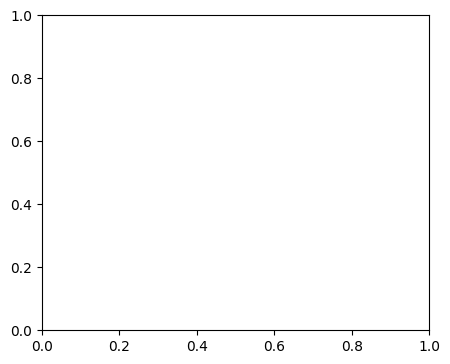

In [147]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

'''
La anchura de cada cuchillo representa el numero de muestras por cluster. Están ordenadas
por su coeficiente de silhouette, por eso tiene esa forma de cuchillo. Cuanta más caida tenga
indica que las muestras tienen un coeficiente mas disperso en ese cluster
Deberian estar todos los clusters por encima de la media.
Hay algunas lineas hacia la izda xq es el coeficiente negativo. Puntos asignados al cluster erroneo.
'''
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(2, 2, k - 2)
    
    y_pred = k_range[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

In [138]:
labels

array([3, 4, 0, ..., 3, 1, 1])

In [116]:
score

0.2644665086929758

In [118]:
y_pred   # aqui està la asignacion de los clusters

array([9, 3, 0, ..., 9, 1, 1])

In [120]:
kmeans.labels_

array([13, 10,  5, ...,  6, 12,  8])

In [121]:
print(y_pred)
print(y_pred is kmeans.labels_)

[9 3 0 ... 9 1 1]
False


In [122]:
kmeans.cluster_centers_

array([[ 6.49694675e-01, -1.23223459e+00,  1.51928743e+00,
        -2.82605875e-01, -2.23406781e-01,  6.60451449e-01,
         8.05957756e-02,  4.52421856e-01, -4.79458698e-01,
        -8.18551126e-02, -5.85333978e-03,  3.44422250e-16,
         1.03763119e-16],
       [-1.64905170e+00, -1.22332051e+00,  1.17179750e+00,
        -3.36041516e-02,  2.09848377e-02, -1.33990508e-01,
        -1.11636107e-01, -1.91416182e-02,  2.72648364e-01,
         4.30832492e-02,  3.10039066e-02,  8.51087459e-16,
         2.54771108e-17],
       [ 2.67014279e+00,  1.34723771e+00, -4.23965120e-01,
         1.15639936e+00, -1.29312533e+00, -5.47751074e-01,
        -3.02427337e-01, -4.09111771e-01,  1.44399059e-01,
         9.62520786e-02,  4.14964492e-02,  6.28410498e-16,
        -1.11554379e-16],
       [-2.56361006e+00, -1.78681827e-01, -1.79043907e+00,
         4.56898473e+00,  9.58714866e-01,  6.50446076e-01,
         3.37095413e+00,  1.68912405e+00, -9.97884630e-01,
         7.43544961e-02, -2.35869304e